# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import random 
import pandas as pd

In [18]:
def f1(x) :
    return np.exp(x)*np.log(x)

def f2(x): 
    return np.sin(x)*np.log(x)

In [16]:
N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns=['Aproximación Función 1', 'Error Función 1', 'Aproximación Función 2', 'Error Función 2'], index = N)

In [20]:
def montecarlo(f, N, a, b) :
    u = np.random.uniform(a, b, round(N)) # Generamos un vector con números aleatorios.
    return np.mean(f(u))*(b-a)

In [21]:
for i in N :
    table.loc[i, 'Aproximación Función 1'] = montecarlo(f1, int(i), 2, 2.1)
    table['Error Función 1'] = np.abs( 6.73789 - table['Aproximación Función 1'])
    table.loc[i, 'Aproximación Función 2'] = montecarlo(f2, int(i), 2, 2.1)
    table['Error Función 2'] = np.abs( 0.13938 - table['Aproximación Función 2']) 
table

,Aproximación Función 1,Error Función 1,Aproximación Función 2,Error Función 2
10.0,0.54895,6.18894,0.063685,0.075695
100.0,0.556236,6.181654,0.063635,0.075745
1000.0,0.558819,6.179071,0.063634,0.075746
10000.0,0.558088,6.179802,0.063645,0.075735
100000.0,0.558037,6.179853,0.063644,0.075736


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def funcion(x, y):
    return x**2 + 2*y**2 <= -1*2*x + 8*y - 7

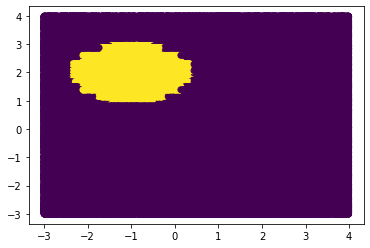

In [5]:
x = np.random.uniform(-3, 4, 1000)
y = np.random.uniform(-3, 4, 1000)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=funcion(X, Y))

In [6]:
def montecarlo(region, ax, bx, ay, by, N):
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx - ax) * (by - ay)
    return np.mean(B) * AR


In [7]:
montecarlo(funcion, -3, 3, -3, 3, 10000)

4.5684000000000005

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

1. El margen de utilidades de un empresario que vende colchones se representa por la siguiente función $$(x^2-5)-(0.16x)$$, si se quiere calcular las ventas del dia 15 al 28 ¿Cuantas ventas fueron en total? 

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
def f1(x):
    return ((x**2)-5)-(0.16*x)

In [71]:
N = np.random.uniform(15, 28, 1000)
table = pd.DataFrame(columns=['Aproximación Función 1', 'Error Función 1'], index = N)
table

,Aproximación Función 1,Error Función 1
25.215002,NaN,NaN
24.179966,NaN,NaN
19.129008,NaN,NaN
20.265201,NaN,NaN
25.348270,NaN,NaN
...,...,...
20.883676,NaN,NaN
22.122863,NaN,NaN
22.631365,NaN,NaN
19.873208,NaN,NaN


In [72]:
def montecarlo(f, N, a, b) :
    u = np.random.uniform(a, b, round(N)) # Generamos un vector con números aleatorios.
    return np.mean(f(u))*(b-a)

In [73]:
for i in N :
    table.loc[i, 'Aproximación Función 1'] = montecarlo(f1, int(i), 15, 28)
    table['Error Función 1'] = np.abs(821730 - table['Aproximación Función 1'])   
table

,Aproximación Función 1,Error Función 1
25.215002,6286.630138,815443.369862
24.179966,6674.143617,815055.856383
19.129008,6847.706175,814882.293825
20.265201,6081.26089,815648.73911
25.348270,6059.09902,815670.90098
...,...,...
20.883676,6526.378693,815203.621307
22.122863,6214.145877,815515.854123
22.631365,5916.187436,815813.812564
19.873208,7121.452691,814608.547309


In [74]:
table['Aproximación Función 1'].sum()

6094203.971388298

Las utlidades generadas en cierto periodo de tiempo se obtienen a partir de la siguiente integral  $\int_{2}^{28} \frac{(x^2-4)}{x}\text{d}x$.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import random 
import pandas as pd

In [11]:
def funcion2(x): 
    return x**2-4/x

In [53]:
N = np.random.uniform(2, 28, 100)
table = pd.DataFrame(columns=['Aproximación Función 1', 'Error Función 1'], index = N)
table

,Aproximación Función 1,Error Función 1
14.013383,NaN,NaN
24.549355,NaN,NaN
16.848798,NaN,NaN
2.451478,NaN,NaN
13.071904,NaN,NaN
...,...,...
5.974191,NaN,NaN
6.937862,NaN,NaN
15.396365,NaN,NaN
24.563375,NaN,NaN


In [13]:
def montecarlo(f, N, a, b) :
    u = np.random.uniform(a, b, round(N)) # Generamos un vector con números aleatorios.
    return np.mean(f(u))*(b-a)


In [54]:
for i in N :
    table.loc[i, 'Aproximación Función 1'] = montecarlo(funcion2, int(i), 2, 28)
    table['Error Función 1'] = np.abs( 6.73789 - table['Aproximación Función 1'])    
table

,Aproximación Función 1,Error Función 1
14.013383,5988.953966,5982.216076
24.549355,6397.829905,6391.092015
16.848798,7098.752567,7092.014677
2.451478,11113.406158,11106.668268
13.071904,6744.29591,6737.55802
...,...,...
5.974191,11740.796513,11734.058623
6.937862,5258.572209,5251.834319
15.396365,11378.459334,11371.721444
24.563375,9265.330764,9258.592874


In [57]:
table["Aproximación Función 1"].sum()

740173.6397271602

Una compañia realizó un estudio de mercado para conocer el público meta de una empresa que vende calcetines.
El público meta se ve representado por el área encerrada en la función.
$$x^2 + y^2 <= -20 + 10x + 15y$$
¿De que tamaño es el mercado meta de la empresa?


In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def funcion3(x, y):
    return x**2 + y**2 <= -1*20 + 10*x + 15*y

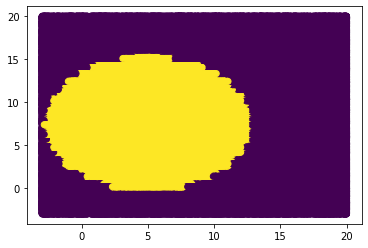

In [35]:
x = np.random.uniform(-3, 20, 1000)
y = np.random.uniform(-3, 20, 1000)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=funcion(X, Y))

In [36]:
def montecarlo2(region, ax, bx, ay, by, N):
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx - ax) * (by - ay)
    return np.mean(B) * AR


In [37]:
montecarlo2(funcion3, -1, 10, -1, 10, 10000)

106.0928